# Exercise 2: Interpreting a human genome

### Prerequisites:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/My Drive/Ubiquitous Genomics/HW2/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Ubiquitous Genomics/HW2/'
/content/gdrive/.shortcut-targets-by-id/1TtDvxh-tLpS8yfoSfrU6tQVO83L7UAIs/Ubiquitous Genomics/HW2
 10945.23andme.9049.txt
 23andme
 ex02_bonusq.docx
'Exercise 2 Interpreting a human genome.gdoc'
'Exercise 2: Interpreting a human genome.gdoc'
'Exercise 2 Interpreting a human genome.pdf'
 genome_report.xlsx
 HW2_Group2_Gil.ipynb
 HW2_Group2.ipynb


In [ ]:
# read the file into a dataframe:
def read_file(file_name):
    my_file = list(open(file_name,'r'))
    return pd.DataFrame(columns = ['rsid','chromosome', 'position','genotype'], 
                        data=[row.split() for row in my_file if row[0] != '#'])

genome = read_file("10945.23andme.9049.txt")

In [ ]:
genome

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC
...,...,...,...,...
631993,i4000693,MT,16524,A
631994,i704756,MT,16524,A
631995,i705255,MT,16525,A
631996,i4000757,MT,16526,G


### Technology

1. What technology has been used to produce this genome (note: we are asking about a technology not a company)?

The technology is geotyping array

2. Please count the number of loci per chromosome and produce a bar graph

In [ ]:
genome['chromosome'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X',
       'Y', 'MT'], dtype=object)

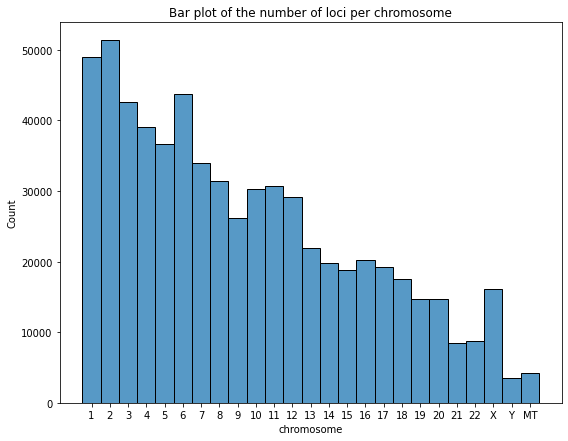

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.histplot(genome, x="chromosome",legend=False).set_title('Bar plot of the number of loci per chromosome');

3. How many loci does the file have?

In [ ]:
print("There are ", genome.shape[0],"loci in the file")

There are  631998 loci in the file


4. What’s the cost per locus (SNP) if it costs the customer $39 to get this file?

In [ ]:
print("The cost per locus is USD ", "{:.7f}".format(39/genome.shape[0]))

The cost per locus is USD  0.0000617


5. Find the lengths of each chromosome of the human genome (hint: use google).

In [ ]:
# using http://www.insilicase.com/Web/Chromlen.aspx

chromosome_lenghts = {
    '1': 247249719,
    '2': 242951149,
    '3': 199501827,
    '4': 191273063,
    '5': 180857866,
    '6': 170899992,
    '7': 158821424,
    '8': 146274826,	
    '9': 140273252,
    '10': 135374737,
    '11': 134452384,
    '12': 132349534,
    '13': 114142980,
    '14': 106368585,
    '15': 100338915,
    '16': 88827254,
    '17': 78774742,
    '18': 76117153,
    '19': 63811651,
    '20': 62435964,
    '21': 46944323,	
    '22': 49691432,
    'X': 154913754,	
    'Y': 57772954,	
    'MT': 16569
}

chromo_length_df = pd.DataFrame(data=chromosome_lenghts.values(), index=chromosome_lenghts.keys(), columns=['chromo_length']).rename_axis('chromosome').reset_index()

a. Draw a scatter plot with X-axis as the length of each chromosome and the y-axis as the number of SNPs in the file.

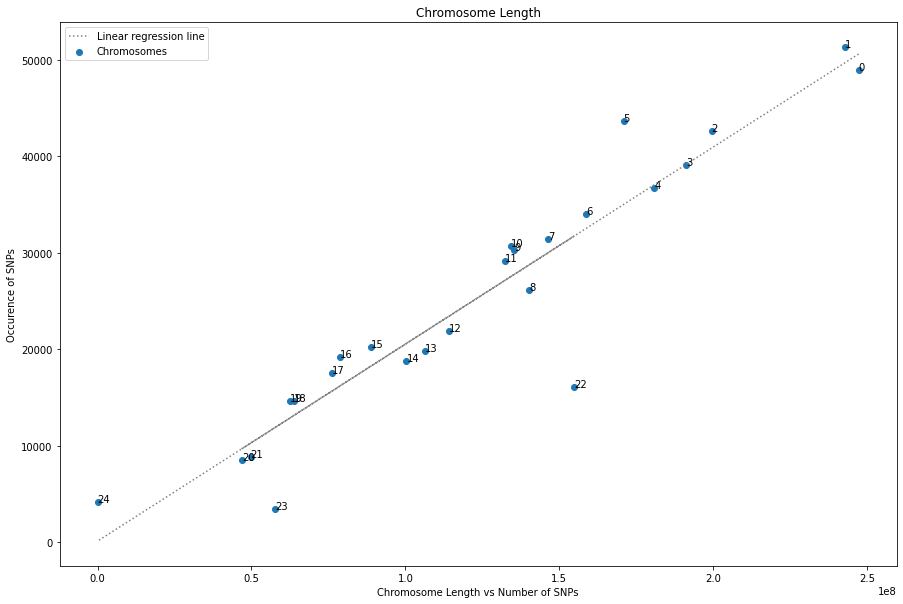

In [ ]:
number_of_snps = genome.groupby('chromosome')['chromosome'].count()
number_of_snps_df = pd.DataFrame(data=number_of_snps.values, index= number_of_snps.index, columns=['occurrence']).reset_index()

joined_dfs = pd.merge(chromo_length_df, number_of_snps_df, how='inner', on='chromosome')

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.scatter(data=joined_dfs, x='chromo_length', y='occurrence', label='Chromosomes')
for chrom in joined_dfs.index: # move labels to mae it more readable
    ax.annotate(chrom, (joined_dfs.loc[chrom, 'chromo_length'], joined_dfs.loc[chrom, 'occurrence']))
    
# add a line to plot the slope
x = joined_dfs['chromo_length']
a = scipy.stats.linregress(joined_dfs['chromo_length'].tolist(), joined_dfs['occurrence'].tolist()).intercept
b = scipy.stats.linregress(joined_dfs['chromo_length'].tolist(), joined_dfs['occurrence'].tolist()).slope
ax.plot(x, a + (b * x), color = 'gray', linestyle = ':', label = 'Linear regression line')

plt.xlabel('Chromosome Length vs Number of SNPs')
plt.ylabel('Occurence of SNPs')
plt.title('Chromosome Length')
plt.legend(loc='upper left')

b. What’s the r^2 between chromosome lengths and number of SNPs?

In [ ]:
r_value = scipy.stats.linregress(joined_dfs['chromo_length'].tolist(), joined_dfs['occurrence'].tolist())
r_squared = np.square(r_value.rvalue)
print(f"The r squared between chromosome lenths and the number of SNPs is {r_squared}") 

The r squared between chromosome lenths and the number of SNPs is 0.8900226359924814


c. Are there over represented or under represented chromosomes?

Yes, there are chromosomes that are under-represented (far below the line) and chromosomes that are over-represented (above the line). Chromosome 5 is over-represented, while chromosomes 22 and 23 are under-represented. 

6. Draw the interval distribution of the gap between each two loci in 1Kb (1000nt) and determine the mean and median.

In [ ]:
distance_df = genome.copy()
distance_df['position2'] = distance_df['position'].shift(1)

distance_df['position2'] = pd.to_numeric(distance_df['position2'], errors='coerce')
distance_df['position'] = pd.to_numeric(distance_df['position'], errors='coerce')

distance_df['difference'] = distance_df['position2'].copy()
distance_df = distance_df.iloc[1:, :]
distance_df['difference'] = (distance_df['position'].astype(int) - distance_df['position2'].astype(int))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#filter to positive loci
loci_consecutive_positive = np.array([loci for loci in distance_df['difference'] if loci > 0])
loci_consecutive_positive = loci_consecutive_positive/1000

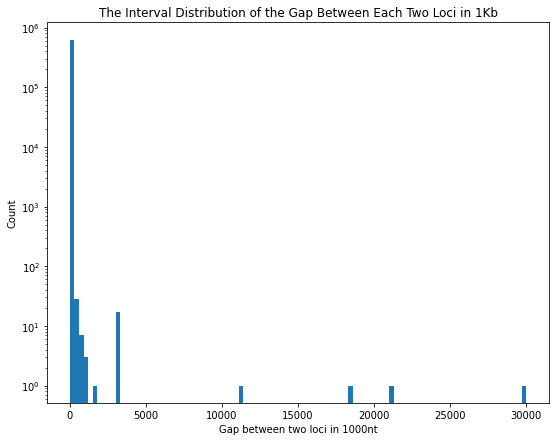

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))

plt.hist(loci_consecutive_positive, log=True, bins=100)
plt.title("The Interval Distribution of the Gap Between Each Two Loci in 1Kb")
plt.xlabel("Gap between two loci in 1000nt")
plt.ylabel("Count");

In [ ]:
mean = loci_consecutive_positive.mean()
median = np.median(loci_consecutive_positive)
print(f"Mean: {mean}")
print(f"Median: {median}")

Mean: 4.776335329074973
Median: 2.528


In [ ]:
zoomed_loci_consecutive = loci_consecutive_positive[loci_consecutive_positive<1000]

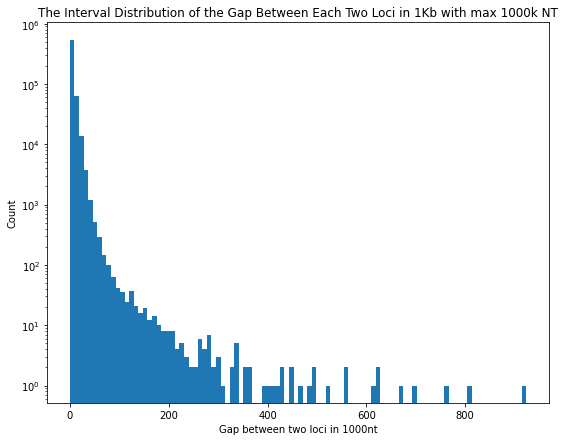

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))

plt.hist(zoomed_loci_consecutive, log=True, bins=100)
plt.title("The Interval Distribution of the Gap Between Each Two Loci in 1Kb with max 1000k NT")
plt.xlabel("Gap between two loci in 1000nt")
plt.ylabel("Count");

In [ ]:
#mean and median on the filtered data
mean = zoomed_loci_consecutive.mean()
median = np.median(zoomed_loci_consecutive)
print(f"Mean filtered data: {mean}")
print(f"Median filtered data: {median}")

Mean filtered data: 4.558686456981363
Median filtered data: 2.528


### Data

7. What’s the percentage of “no call” loci?

In [ ]:
no_call = genome[genome['genotype']=='--']
numb_of_no_call = no_call.shape[0]

# to do: pretty format
no_cell_perct = round((numb_of_no_call / genome.shape[0]) * 100, 3)
print(f"There is {no_cell_perct}% of no call loci")

There is 1.531% of no call loci


8. Only for the autosome, create a 6x6 matrix with columns as “A”, “C”, “G” and “T”, “I”, “D” and rows along the same values. For each called genotype, place the call in the table based on the first and the second allele. For example: “AA” will go to the first row and first column. “AC” will go to the second column and first row, and so on. Report the distribution of the table. What’s the most prevalent genotype?

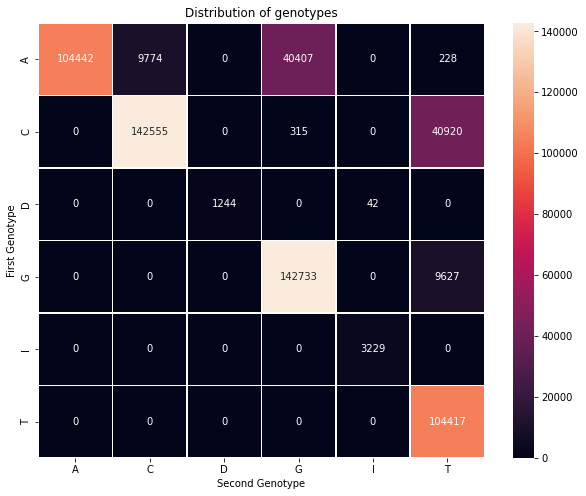

In [ ]:
# heat map on correlation between two genotypes
autosome_df = genome.replace(to_replace='X', value=23).set_index(['chromosome']).reset_index()
autosome_df = autosome_df[autosome_df['genotype'] != '--']

autosome_df = pd.concat((autosome_df['genotype'].str.get(0), autosome_df['genotype'].str.get(1)), axis=1)
autosome_df.columns = ['First Genotype', 'Second Genotype']

autosome_df = autosome_df.groupby(['First Genotype', 'Second Genotype']).size().reset_index().pivot('First Genotype', 'Second Genotype', 0).fillna(0)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(autosome_df, annot=True, fmt=".0f", linewidths=.5, ax=ax)
ax.set_title('Distribution of genotypes');

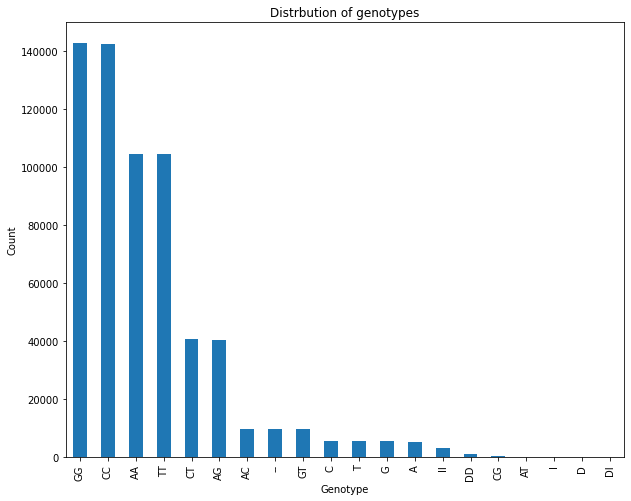

In [ ]:
# report distribution
genotype_dist = genome.groupby(['genotype']).size()
genotype_dist = genotype_dist.sort_values(ascending=False)
genotype_dist.plot.bar(figsize=(10, 8))

plt.title('Distrbution of genotypes')
plt.ylabel('Count')
plt.xlabel('Genotype'); 

The most prevalent genotype is GG, followed by CC. Most of the palindrome genotypes are the common ones.

9. Looking only on the autosome, what’s the percentage of loci with homozygous SNPs?

In [ ]:
homozygous_snps = ['AA', 'CC', 'TT', 'GG']

autosome = genome[~genome['chromosome'].isin(['X', 'Y', 'MT'])]
autosome_count = autosome.shape[0]
homozygous_count = autosome[autosome['genotype'].isin(homozygous_snps)].shape[0]

percentage = round((homozygous_count / autosome_count) * 100, 3)
print(f"There are {percentage}% of loci with homozygous SNPs in their autosome")

There are 81.176% of loci with homozygous SNPs in their autosome



10. Is this person a male or a female? Explain why.

In [ ]:
y = genome[genome['chromosome']=='Y']
if y.empty:
  print('i am a lady')
else:
  print('i am a male')

i am a male


This person is a male because there exists a Y chromosome

### Health

11. ApoE is a gene that has three types of alleles: ApoE2, ApoE3, and ApoE4. Read the SNPedia page on ApoE.

a. Create a function that takes the genome file of a person and returns the ApoE status.

In [ ]:
# rs429358	rs7412	
def apoe_status(file_name):
  genome = read_file(file_name)

  # (rs429358, rs7412): epsilon
  apoe_status_dict = {('C', 'T'): 'ε1', ('T', 'T'): 'ε2', ('T', 'C'): 'ε3', ('C', 'C'): 'ε4'}

  if 'rs7412' in genome['rsid'].tolist() and 'rs429358' in genome['rsid'].tolist():
    rs429358 = genome[genome['rsid'] == 'rs429358']
    rs7412 = genome[genome['rsid'] == 'rs7412']

    rs429358_genotype1= rs429358['genotype'].values[0][0]
    rs7412_genotype1 = rs7412['genotype'].values[0][0]

    rs429358_genotype2= rs429358['genotype'].values[0][0]
    rs7412_genotype2 = rs7412['genotype'].values[0][1]

    apoe_status1 = apoe_status_dict[(rs429358_genotype1, rs7412_genotype1)]
    apoe_status2 = apoe_status_dict[(rs429358_genotype2, rs7412_genotype2)]
    return f'Apo-{apoe_status1}/{apoe_status2}'

  else:
    return 'Undetected'

b. For the person of interest, what are the two ApoE alleles?

In [ ]:
print(apoe_status("10945.23andme.9049.txt"))

Apo-ε3/ε3


c. What can you tell this person about her/his risk to Alzheimer?

According to the table from [SNPedia](https://www.snpedia.com/index.php/APOE), Apo-ε3/ε3 is the most common allelic variants of ApoE. Referencing the [Alzheimers Disease Genetics fact sheet](https://www.nia.nih.gov/health/alzheimers-disease-genetics-fact-sheet), it states that Apo-ε3/ε3 is beleived to play a neutral role in the disease (thus, neither decreasing nor increasing the risk). 

12. Delta F508 is the most prevalent mutation in Cystic Fibrosis, a recessive disease. For the sake of the exercise, let’s assume it is the only mutation that causes Cystic Fibrosis. Read the SNPedia page on Cystic Fibrosis.

a. Create a function that takes the genome file of a person and returns the Delta F508.

In [ ]:
# rs113993960 and i3000001 are also known as Delta F508, and cause of about 70% of cystic fibrosis cases. This mutation is a deletion of three nucleotides. An alternate name for this variant is rs199826652.

def deltaf508_status(file_name):
  genome = read_file(file_name)

  # genome name depends on sequencing company
  genome_rsids = genome['rsid'].tolist()
  if 'rs199826652' in genome_rsids:
    rs199826652 = genome[genome['rsid']=='rs199826652']
    rs199826652_genotype = rs199826652['genotype'].values[0]
    return rs199826652_genotype

  elif 'rs113993960' in genome_rsids:
    rs113993960 = genome[genome['rsid']=='rs113993960']
    rs113993960_genotype= rs113993960['genotype'].values[0]
    return rs113993960_genotype

  elif 'i3000001' in genome_rsids: #23andMe
    i3000001 = genome[genome['rsid']=='i3000001']
    i3000001_genotype = i3000001['genotype'].values[0]
    return i3000001_genotype
  else:
    return 'Undetected'

b. For the person of interest, what’s her/his Cystic Fibrosis status?

In [ ]:
print(deltaf508_status("10945.23andme.9049.txt"))

II


The CFTR gene in chromosome 7, in position 507 there is a codon that translates to aminoacid I. At position 508, we would expect to codify F. If there is a deletion (Delta on position 508), the mutation will still code an aminoacid I on position 507. The missing codon will make the CFTR protein to unfold incorrectly giving place to the disease.

Since both genotypes are II, this person is considered healthy and not even a carrier. 

Refrences:
https://www.snpedia.com/index.php/Rs113993960
https://en.wikipedia.org/wiki/Cystic_fibrosis#Causes
https://en.wikipedia.org/wiki/Cystic_fibrosis_transmembrane_conductance_regulator#Mechanism

c. This person considers marrying someone who is a carrier. What do you
recommend for this person?

Cystic Fibrosis is a recessive disease such that if a person has a mutation of the gene, they are a carrier if both copies from both parents have the mutation. CF is inherited when both copies of the CF gene are affected. If neither copies are affected, you are not a carrier. 

Before putting a ring on it, we would recommend that they consider the risk that their future offspring have a 50% chance of being a carrier of CF. Knowing that our person is not a carrier but their spouse is gives their offspring a 50% chance of receiving the mutuation (from the carrier) and thus becoming a carrier themselves, but they will not be sick.

To be on the safe side, they could test their embryo during pregnancy or use IVF to select specific embryo or consider sperm/egg donation. 

https://arkansascf.com/handout-cf-carrier

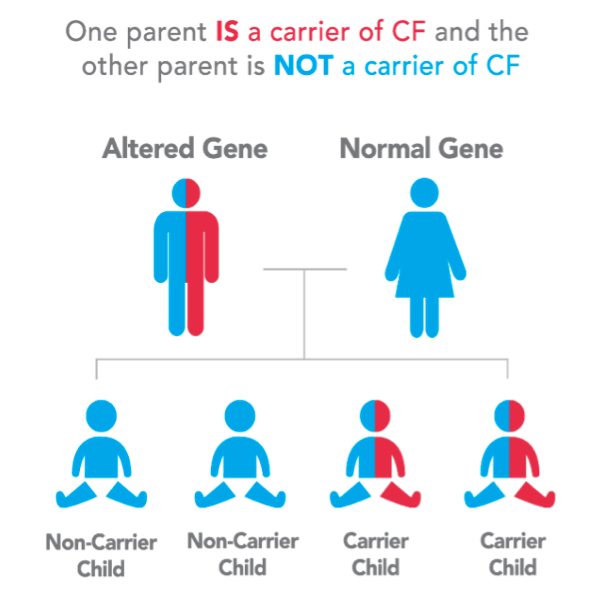

### Scale up

13. Go to OpenSNP.org and download the *latest* 100 genomes from 23andMe. For each genome, call the ApoE status and Delta F508. Report the results in an Excel table with openSNP id, ApoE status, and Delta F508.


In [ ]:
# show all the files in the AfterFixing directory
import glob, os

path = r'/content/gdrive/My Drive/Ubiquitous Genomics/HW2/23andme/'                  
dir_list = os.listdir(path)

rows = []
results = pd.DataFrame(columns=['File Name', 'ApoE Status', 'Delta F508'])
for file_name in dir_list:
  full_path = f"{path}{file_name}"

  try:
    data = [file_name, apoe_status(full_path), deltaf508_status(full_path)]
    rows.append(data)
    results.loc[len(results)] = data
  except:
    print('')

print(results)
results.to_excel("genome_report.xlsx")  






             File Name ApoE Status Delta F508
0   10770.23andme.8918   Apo-ε4/ε4         II
1   10632.23andme.8882   Apo-ε3/ε2         CC
2   10637.23andme.8889   Apo-ε3/ε2         II
3   10638.23andme.8890   Apo-ε3/ε3         II
4   10649.23andme.8896   Apo-ε3/ε3         II
..                 ...         ...        ...
90  10579.23andme.9146   Apo-ε4/ε4         II
91  11024.23andme.9147   Apo-ε3/ε2         II
92  11024.23andme.9148   Apo-ε3/ε2         II
93  11025.23andme.9150   Apo-ε3/ε2         II
94  11025.23andme.9149   Apo-ε3/ε2         II

[95 rows x 3 columns]


14. Report table with the frequency of the three ApoE alleles in the population and the delta F508.

    ApoE Type  ApoE Count  Percentage
0   Apo-ε3/ε3          59   62.105263
1   Apo-ε3/ε2          16   16.842105
2   Apo-ε4/ε4          10   10.526316
3   Apo-ε2/ε3           4    4.210526
4  Undetected           3    3.157895
5   Apo-ε4/ε1           3    3.157895


Text(0, 0.5, 'Count')

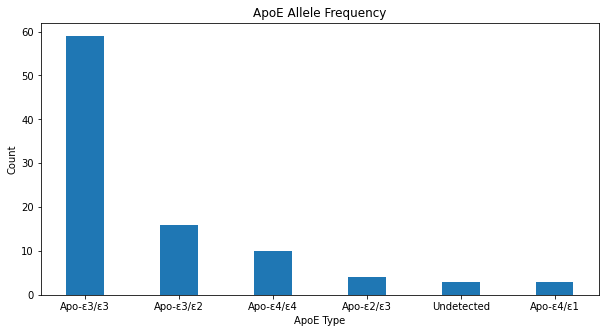

In [ ]:
apoe_df = results['ApoE Status'].value_counts().to_frame().reset_index()
apoe_df.columns = ['ApoE Type', 'ApoE Count']
apoe_df['Percentage'] = (apoe_df['ApoE Count'] / apoe_df['ApoE Count'].sum()) * 100
print(apoe_df)

fig = plt.figure(figsize = (10, 5))
plt.bar(apoe_df['ApoE Type'], apoe_df['ApoE Count'], width = 0.4)
plt.title('ApoE Allele Frequency')
plt.xlabel('ApoE Type')
plt.ylabel('Count')

According to the latest 100 genomes form 23andMe, most people are of ApoE status Apo-ε3/ε3 which makes sense because it is the most common variant. There is about 10% that have the Apo-ε4/ε4 variant which gives a 11x increased risk of having Alzheimer's. 

  Delta F508 Type  Delta F508 Count  Percentage
0              II                89   93.684211
1              DI                 3    3.157895
2      Undetected                 2    2.105263
3              CC                 1    1.052632


Text(0, 0.5, 'Count')

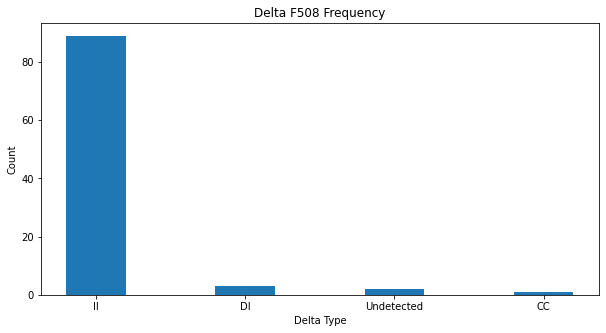

In [ ]:
delta_df = results['Delta F508'].value_counts().to_frame().reset_index()
delta_df.columns = ['Delta F508 Type', 'Delta F508 Count']
delta_df['Percentage'] = (delta_df['Delta F508 Count'] / delta_df['Delta F508 Count'].sum()) * 100
print(delta_df)

fig = plt.figure(figsize = (10, 5))
plt.bar(delta_df['Delta F508 Type'], delta_df['Delta F508 Count'], width = 0.4)
plt.title('Delta F508 Frequency')
plt.xlabel('Delta Type')
plt.ylabel('Count')

Given the same 100 latest genomes from 23andMe, we can see that a significant amount do not have CF and are not carriers of the disease. 

###GEDMatch

15. Upload the original genome to GEDmatch. Use the following setting and report back the kid ID.

Kit Number: LJ6182397

16. Use the one-to-many tool, what’s the closest match to the person? How many cM do they share? What do you think is their familial relationship?

The closest match to the person is Vladislav Artemyev (YC2184531), with a generational listing of 1 which can be either a parent or a child. They share 3580.1 cM and 384261 SNPs. Given that Vladislav Artemyev is 851 days / 2.3 years old, we will make the safe assumption that they are the child of the person. And according to a [quick wikipedia search](https://en.wikipedia.org/wiki/Vladislav_Artemiev), their child could be a famous chest person!

17. Explore GEDmatch a bit. Are the parents of this person cousins?



Using the ['Are your parents related?' tool](https://app.gedmatch.com/v_compare_parents2.php) on GEDMatch, we found that there are no shared DNA segments which indicates that this persons cousins are probably not related within the recent generations. 

There needs to be a segment of size 7cM mininmum for there to indicate that their parents are related and the largest segment for this person is 0cm.

18. What do you think is the ethnic background of this person based on matches?

Given the name of this persons closest match (Vladislav Artemyev) which is probably their child, we believe that this person is of Eastern Slavic (Russian) ethnicity. We also have more indication to this from their name, which ends in -ev. 

We found the same last name in a [Jewish geneology website](https://kehilalinks.jewishgen.org/Colonies_of_Ukraine/melitopol/AbAz.htm) which could be random but could also indicate that the heritage might be Ukranian. 

Using Admixture (heritage) Eurotest project, we found this pie chart:

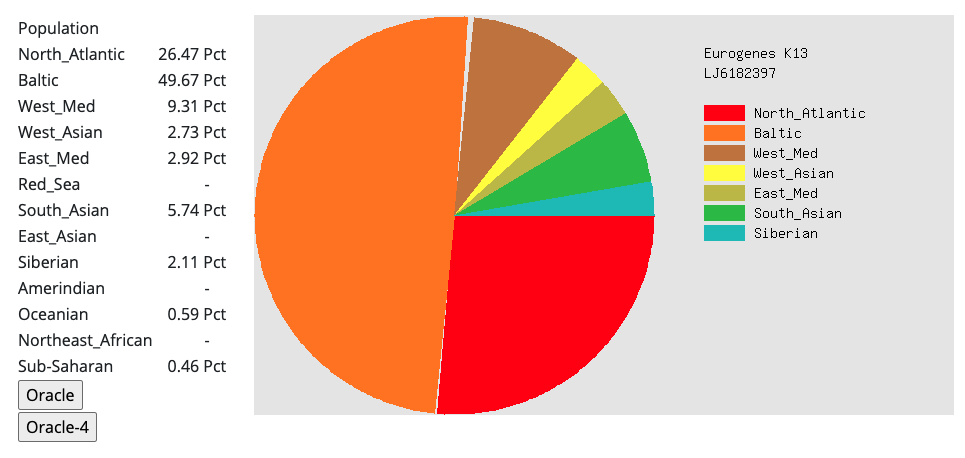

### Bonus

1. Consider that the sensitivity of calling correctly a rare disease variant is 100% and the specificity is 99.5%. For example, consider that the disease variant is “A” and the healthy variant is “C”. Now, for 1000 people who are “CC”, the 995 will be reported as “CC” and 5 as “AC”.

a. Based on internet searches find the allele frequency of rs386833395 for Europeans

0.02%

Source: https://www.ncbi.nlm.nih.gov/clinvar/variation/17662/?new_evidence=true

Quote from the above source:

The BRCA1 c.68_69delAG; p.Glu23ValfsTer17 variant (rs386833395), also known as 185delAG, is a well known founder variant associated with breast, ovarian, and pancreatic cancer in the Ashkenazi Jewish population as well as other ethnic populations (Abeliovich 1997, Antoniou 2005, King 2003, Laitman 2019, Lucas 2014). This variant is reported as pathogenic by multiple laboratories in ClinVar (Variation ID: 17662), and is found in the general population with an overall allele frequency of 0.02% (58/282442 alleles) in the Genome Aggregation Database.


b. What disease is associated with this variant

Breast cancer, ovarian cancer, and pancreatic cancer. (Also from the above source)


c. You find that a person is a carrier for this variant. What are the chances
that the person is truly positive?

Definitions:

C - Person is a carrier

P - Positive test result (the test result shows disease variant)

We want to calculate the probability of C given P, using Bayes’ theorem:

P(C|P) = (P(P|C) ⋅ P(C)) / P(P)

Figuring out the values for the individual parts of the formula:

P(P|C) = 1

Explanation: The probability that the test result shows positive when the person is a carrier. This is 1 because the “sensitivity” is given to be 100%.

P(C) = 0.0002

Explanation: The probability that an arbitrary person is a carrier. This is 0.02% from part a above.

P(P) = 0.0002 ⋅ 1 + 0.9998 ⋅ 0.005 = 0.005199

Explanation: The probability that an arbitrary person tests positive. If they are a true carrier -- with a probability of 0.02% -- then the probability is 1. If they are not a carrier -- with a probability of 99.98% -- then the probability (for a false positive) is 0.5% (from the given “specificity” of 99.5%).

Plugging the above 3 values into the original formula (using Bayes’ theorem) we get:

P(C|P) = (1 ⋅ 0.0002) / 0.005199 ≈ 0.038

Therefore the final result is: If a person tests positive for the variant, the chances that they are truly positive are only 3.8%


d. Suggest at least one method to confirm the status of the variant

We can improve the technology of the test to be more accurate, or alternatively, perform multiple tests using different technologies such that the probability of a false negative decreases.

For example, if we can increase the test specificity from 99.5% to 99.99%, then our confidence in the correctness of a positive test result now increases from 3.8% to 67%.

If we increase the specificity even more to 99.999% then our confidence of positive test results would be 95%.

e. Will you use Promethase after knowing the answer for this question

We don’t know, but apparently this is not just a theoretical issue: there are real people being impacted by the unreliable-ness of detecting rare genetic diseases.

Here is an interesting article from February 2021 titled “Large-scale study finds genetic testing technology falsely detects very rare variants”: https://www.sciencedaily.com/releases/2021/02/210215211036.htm

Choice quotes:

The study concluded that SNP chips performed extremely well in detecting common genetic variants. However, the rarer the variation was, the less reliable the results became. In very rare variants, present in fewer than 1 in 100,000 individuals, typical of those causing rare genetic disease, 84 per cent were false positives
...
We've confirmed that SNP chips are extremely poor at detecting very rare disease-causing genetic variants, often giving false positive results that can have profound clinical impact. These false results had been used to schedule invasive medical procedures that were both unnecessary and unwarranted."
